In [8]:
library(datasets)
library(graphics)
library(grDevices)
#library(lme4)
#library(lmerTest)
#library(car)
#library(carData)
#library(multcomp)
#library(lsmeans)
library(MASS)
library(ggplot2)
library(methods)
library(Matrix)
#library(multcomp)
#library(mvtnorm)
library(stats)
library(survival)
#library(TH.data)
library(utils)
library(readr)
library(WRS2)
library(pgirmess)

ERROR: Error in library(pgirmess): there is no package called ‘pgirmess’


In [9]:
install.packages("pgirmess")

also installing the dependencies ‘gtools’, ‘gdata’, ‘deldir’, ‘gmodels’, ‘expm’, ‘rgdal’, ‘rgeos’, ‘spdep’, ‘splancs’

Warning message in install.packages("pgirmess"):
“installation of package ‘gtools’ had non-zero exit status”Warning message in install.packages("pgirmess"):
“installation of package ‘deldir’ had non-zero exit status”Warning message in install.packages("pgirmess"):
“installation of package ‘expm’ had non-zero exit status”Warning message in install.packages("pgirmess"):
“installation of package ‘rgdal’ had non-zero exit status”Warning message in install.packages("pgirmess"):
“installation of package ‘rgeos’ had non-zero exit status”Warning message in install.packages("pgirmess"):
“installation of package ‘splancs’ had non-zero exit status”Warning message in install.packages("pgirmess"):
“installation of package ‘gdata’ had non-zero exit status”Warning message in install.packages("pgirmess"):
“installation of package ‘gmodels’ had non-zero exit status”Warning message in i

In [5]:
data = read_csv('AA2_Avoid_Motor_Final_28_subjcts.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  ID = col_integer(),
  Cluster_avoid_cutoff_55 = col_integer(),
  Cluster_hierarc_method_complet = col_integer(),
  Perf_Group = col_integer(),
  Order = col_integer(),
  Last6Total = col_integer(),
  STAI_T = col_integer(),
  BIS = col_integer(),
  AllAR = col_integer(),
  STAIS_Group = col_integer(),
  BIS_Group = col_integer(),
  ID2 = col_integer(),
  STAIT_Groups = col_integer(),
  BISMedian_Group = col_integer(),
  VAR00006 = col_integer(),
  AR_Group = col_integer(),
  Age = col_integer(),
  Ancestry = col_integer(),
  Sex = col_integer(),
  Marital_Status = col_integer()
  # ... with 99 more columns
)
See spec(...) for full column specifications.


In [3]:
#colnames(data)

In [4]:
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==1]<-'good learners'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==2]<-'stable intermediate'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==3]<-'stable hyperavoiders'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==4]<-'stable hypo-avoiders'

data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==1]<- 'stable HyperAvoiders'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==2]<-'good learners'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==3]<-'good learners'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==4]<- 'stable hypo-avoiders' 
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==5]<-'stable hypo-avoiders'

ERROR: Error in `*tmp*`$Avoidance_clusters: objeto de tipo 'closure' não possível dividir em subconjuntos


In [30]:
data <- data[!(is.na(data$Avoidance_clusters)), ]
data$Avoidance_clusters <- as.factor(data$Avoidance_clusters)

# ANXIETY

## State anxiety

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   48.9   24.45   0.766  0.476
Residuals               24  766.4   31.93               

Warning message in t1waybt(data$STAI_S ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$STAI_S ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 467.

Test statistic: 0.9814 
p-value: 0.38758 
Variance explained 0.159 
Effect size 0.398 



	Kruskal-Wallis rank sum test

data:  data$STAI_S by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.87455, df = 2, p-value = 0.6458


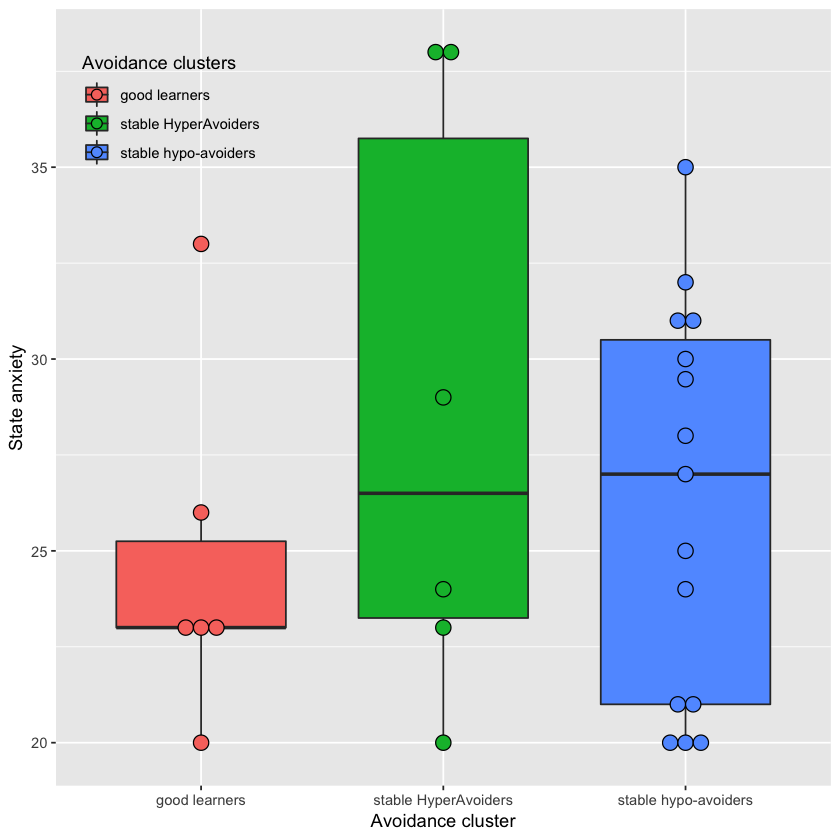

In [31]:
summary(aov(data$STAI_S ~ data$Avoidance_clusters))

t1waybt(data$STAI_S ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$STAI_S ~ data$Avoidance_clusters)

StaiSBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_S,
                                    fill=Avoidance_clusters))
StaiSBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center") +
    labs(x="Avoidance cluster", y="State anxiety") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Trait anxiety

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   38.7   19.33   0.577  0.569
Residuals               24  804.0   33.50               

Warning message in t1waybt(data$STAI_T ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$STAI_T ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 564.

Test statistic: 0.1972 
p-value: 0.81915 
Variance explained 0.077 
Effect size 0.278 



	Kruskal-Wallis rank sum test

data:  data$STAI_T by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.5426, df = 2, p-value = 0.7624


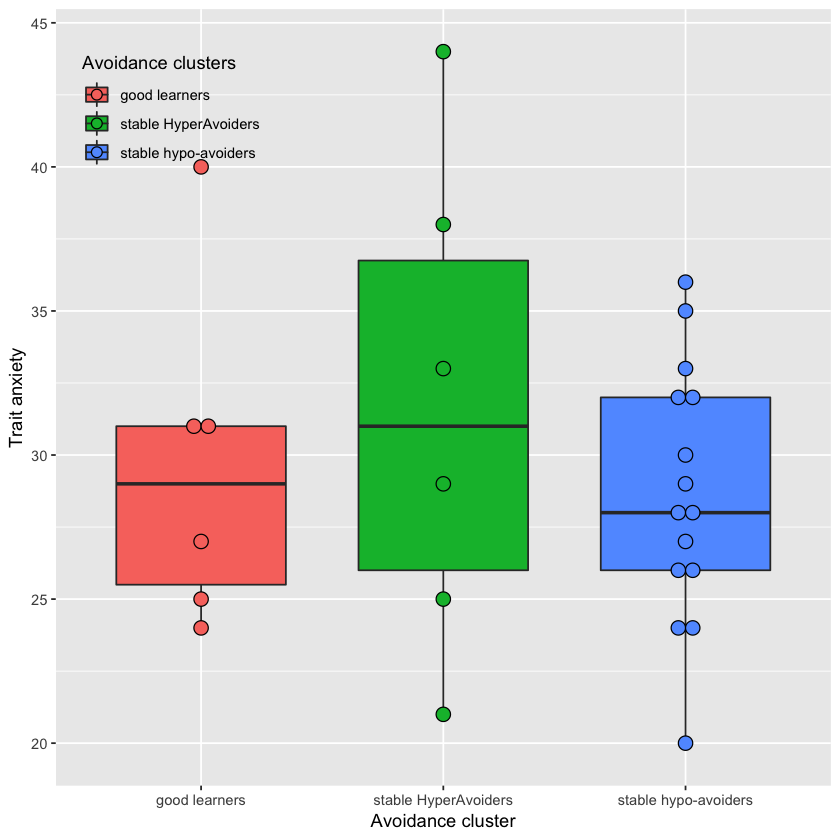

In [32]:
summary(aov(data$STAI_T ~ data$Avoidance_clusters))

t1waybt(data$STAI_T ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$STAI_T ~ data$Avoidance_clusters)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_T,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.5, stackdir="center") +
    labs(x="Avoidance cluster", y="Trait anxiety") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Anxiety right before the task

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  10.30   5.150   5.428 0.0137 *
Residuals               19  18.03   0.949                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
5 observations deleted due to missingness

Warning message in t1waybt(data$VAS_Pre ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$VAS_Pre ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 173.

Test statistic: NaN 
p-value: NaN 
Variance explained 0.406 
Effect size 0.637 


Call:
mcppb20(formula = data$VAS_Pre ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                psihat ci.lower ci.upper
stable hypo-avoiders vs. stable HyperAvoiders -0.66667 -3.00000  0.33333
stable hypo-avoiders vs. good learners         0.75000 -1.00000  1.79167
stable HyperAvoiders vs. good learners         1.41667  0.45833  3.52083
                                              p-value
stable hypo-avoiders vs. stable HyperAvoiders 0.16027
stable hypo-avoiders vs. good learners        0.26377
stable HyperAvoiders vs. good learners        0.00167



	Kruskal-Wallis rank sum test

data:  data$VAS_Pre by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.3823, df = 2, p-value = 0.02494


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

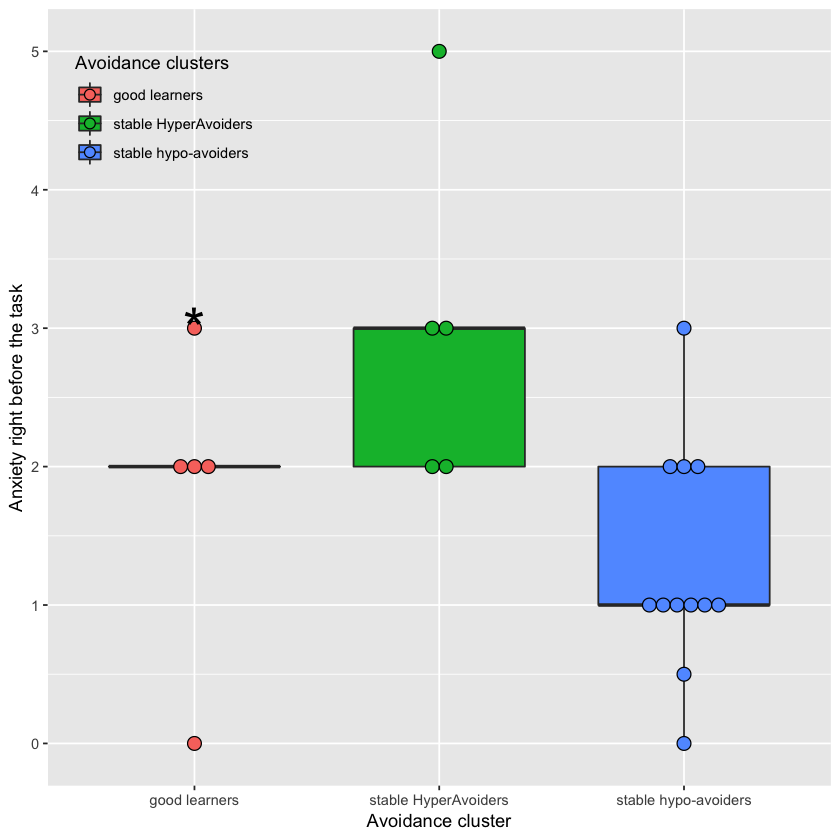

In [34]:
summary(aov(data$VAS_Pre ~ data$Avoidance_clusters))

t1waybt(data$VAS_Pre ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$VAS_Pre ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$VAS_Pre ~ data$Avoidance_clusters)
#kruskalmc

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Pre,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety right before the task") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=3, label="*", size=12)

## Anxiety over the task

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  13.77   6.884   1.708  0.208
Residuals               19  76.56   4.030               
5 observations deleted due to missingness

Warning message in t1waybt(data$VAS_Task ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$VAS_Task ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 363.

Test statistic: 2.2338 
p-value: 0.09366 
Variance explained 0.312 
Effect size 0.558 



	Kruskal-Wallis rank sum test

data:  data$VAS_Task by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.9339, df = 2, p-value = 0.2306


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

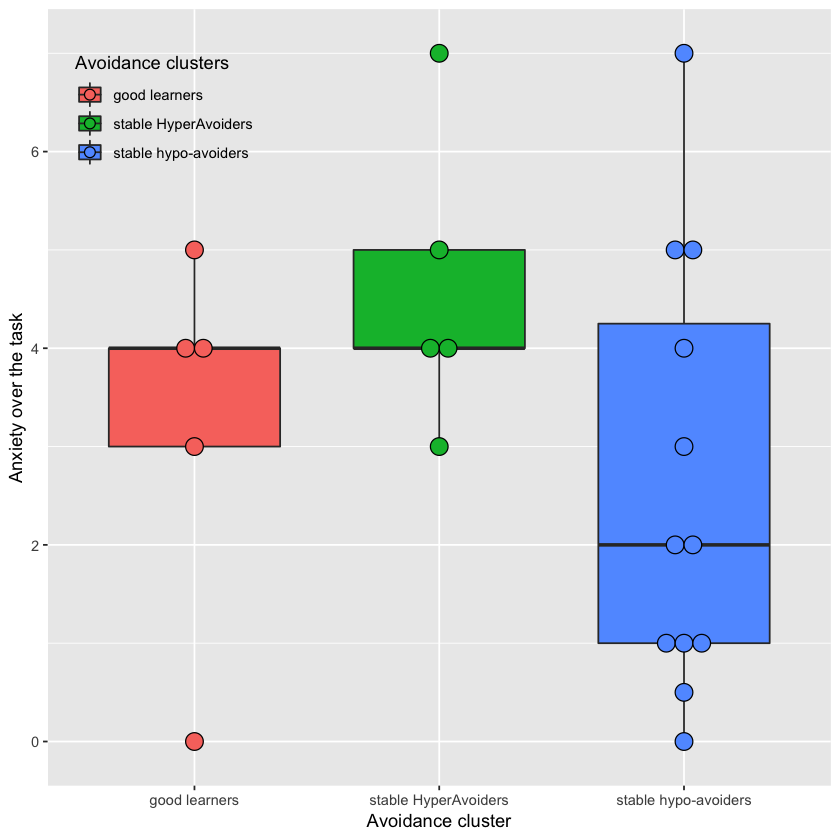

In [35]:
summary(aov(data$VAS_Task ~ data$Avoidance_clusters))

t1waybt(data$VAS_Task ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$VAS_Task ~ data$Avoidance_clusters)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Task,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.18, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety over the task") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Anxiety right after the task

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  4.119  2.0593    2.17  0.142
Residuals               19 18.029  0.9489               
5 observations deleted due to missingness

Warning message in t1waybt(data$VAS_Post ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$VAS_Post ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 0.

Test statistic: NaN 
p-value: NaN 
Variance explained 0.401 
Effect size 0.633 



	Kruskal-Wallis rank sum test

data:  data$VAS_Post by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.4268, df = 2, p-value = 0.1093


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

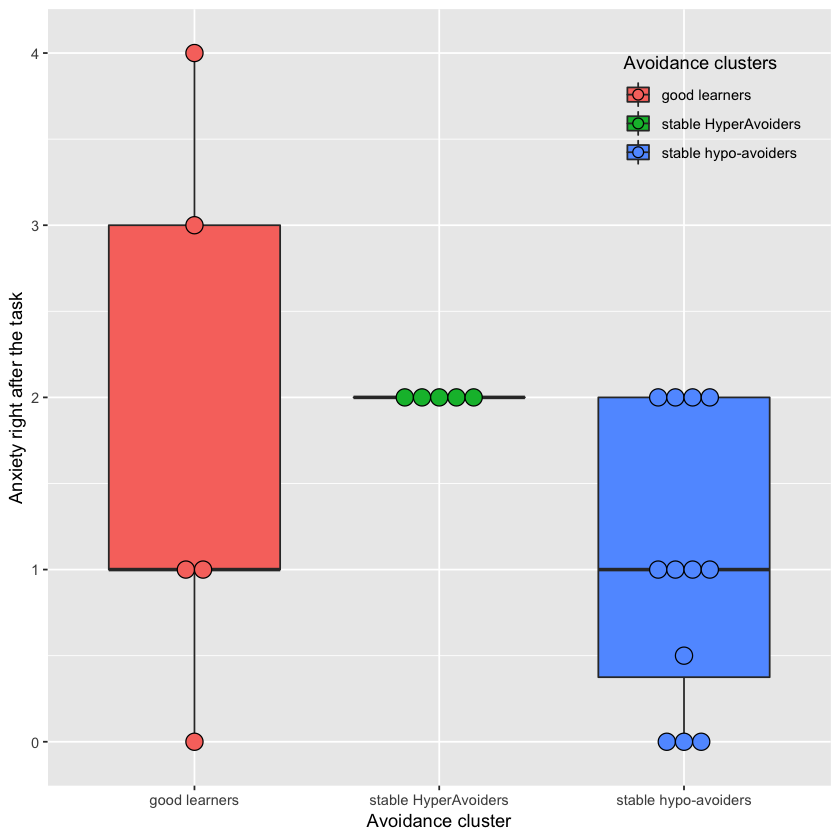

In [38]:
summary(aov(data$VAS_Post ~ data$Avoidance_clusters))

t1waybt(data$VAS_Post ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$VAS_Post ~ data$Avoidance_clusters)
#kruskalmc(data$VAS_Post ~ data$Avoidance_clusters)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Post,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety right after the task") + 
    theme(legend.position=c(0.85,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

# COPING STYLES

## Acceptance coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  17.97   8.985   0.752  0.486
Residuals               18 214.98  11.943               
6 observations deleted due to missingness

Warning message in t1waybt(data$Accept ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Accept ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 434.

Test statistic: 0.2184 
p-value: 0.74885 
Variance explained 0.11 
Effect size 0.332 



	Kruskal-Wallis rank sum test

data:  data$Accept by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.0724, df = 2, p-value = 0.585


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

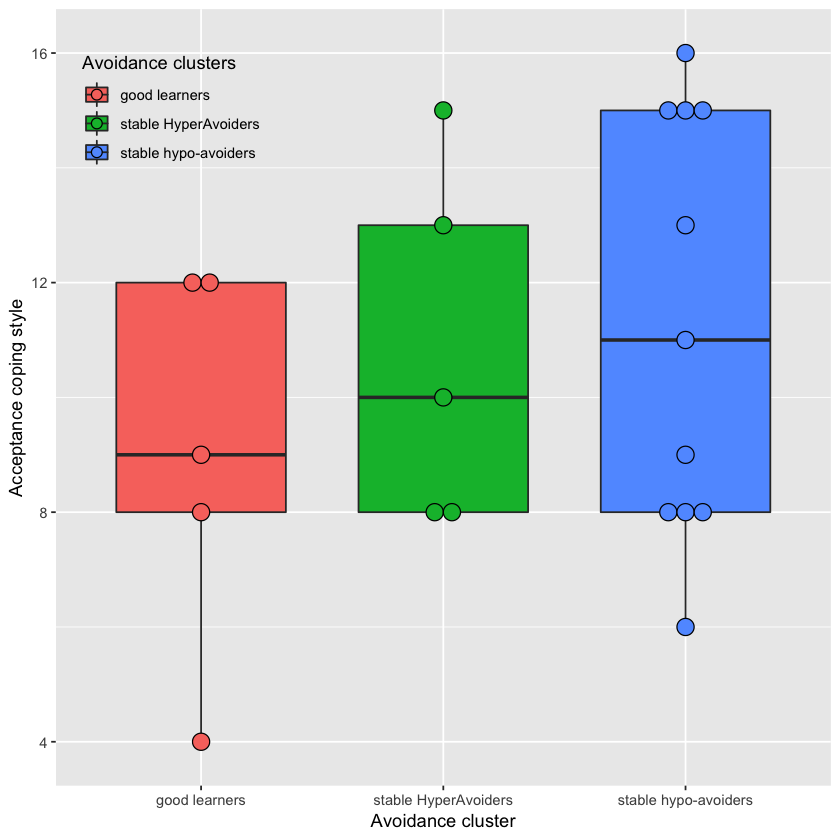

In [41]:
summary(aov(data$Accept ~ data$Avoidance_clusters))

t1waybt(data$Accept ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$Accept ~ data$Avoidance_clusters)

AcceptBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Accept,
                                    fill=Avoidance_clusters))
AcceptBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Acceptance coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Active coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  28.91  14.455   5.617 0.0127 *
Residuals               18  46.33   2.574                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Active ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Active ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 213.

Test statistic: NaN 
p-value: NaN 
Variance explained 0.688 
Effect size 0.83 


Call:
mcppb20(formula = data$Active ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                psihat ci.lower ci.upper
stable hypo-avoiders vs. stable HyperAvoiders -3.33333 -5.66667 -1.33333
stable hypo-avoiders vs. good learners        -1.28571 -3.47619  0.00000
stable HyperAvoiders vs. good learners         2.04762 -0.61905  3.95238
                                              p-value
stable hypo-avoiders vs. stable HyperAvoiders 0.00000
stable hypo-avoiders vs. good learners        0.02003
stable HyperAvoiders vs. good learners        0.05676



	Kruskal-Wallis rank sum test

data:  data$Active by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.2019, df = 2, p-value = 0.01656


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

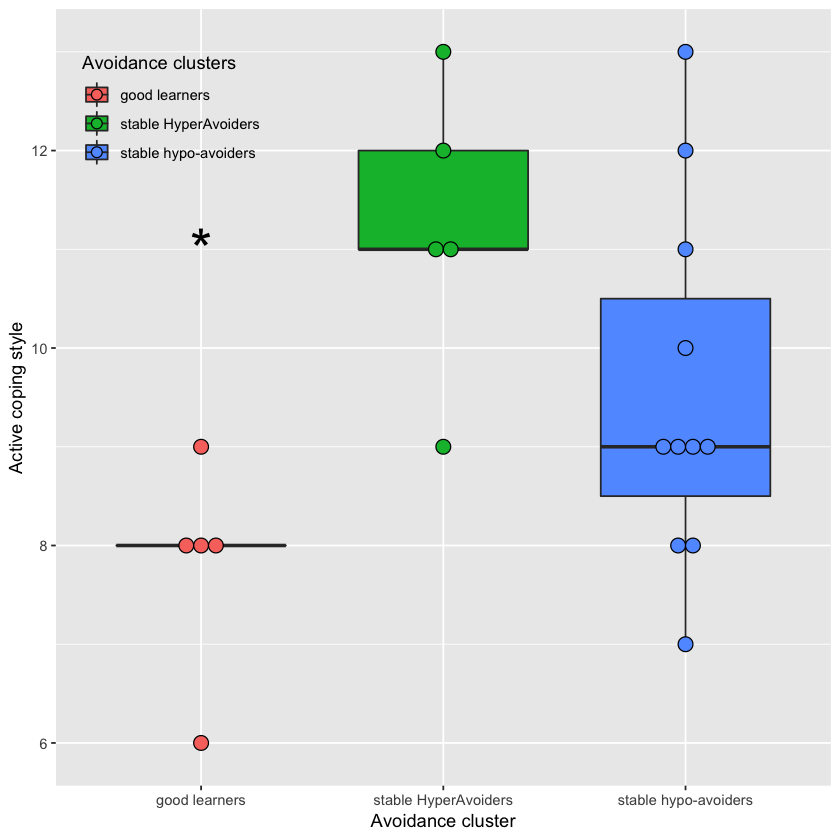

In [43]:
summary(aov(data$Active ~ data$Avoidance_clusters))

t1waybt(data$Active ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$Active ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$Active ~ data$Avoidance_clusters)

ActiveBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Active,
                                    fill=Avoidance_clusters))
ActiveBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Active coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label="*", size=12)

## Denial coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   0.46  0.2312   0.094   0.91
Residuals               18  44.11  2.4505               
6 observations deleted due to missingness

Warning message in t1waybt(data$Denial ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Denial ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 300.

Test statistic: 0.2425 
p-value: 0.7 
Variance explained 0.176 
Effect size 0.419 



	Kruskal-Wallis rank sum test

data:  data$Denial by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.27951, df = 2, p-value = 0.8696


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

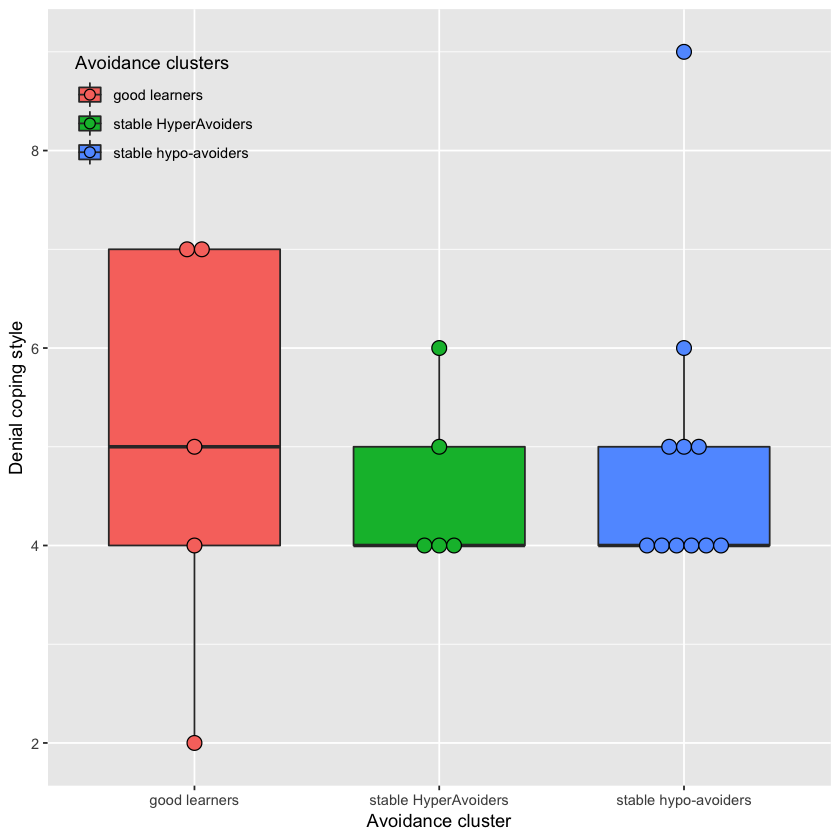

In [44]:
summary(aov(data$Denial ~ data$Avoidance_clusters))

t1waybt(data$Denial ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$Denial ~ data$Avoidance_clusters)

DenialBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Denial,
                                    fill=Avoidance_clusters))
DenialBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Denial coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Religious coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  78.36   39.18   2.632 0.0994 .
Residuals               18 267.93   14.88                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Religious ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Religious ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 114.

Test statistic: NaN 
p-value: NaN 
Variance explained 0.397 
Effect size 0.63 



	Kruskal-Wallis rank sum test

data:  data$Religious by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 3.4846, df = 2, p-value = 0.1751


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

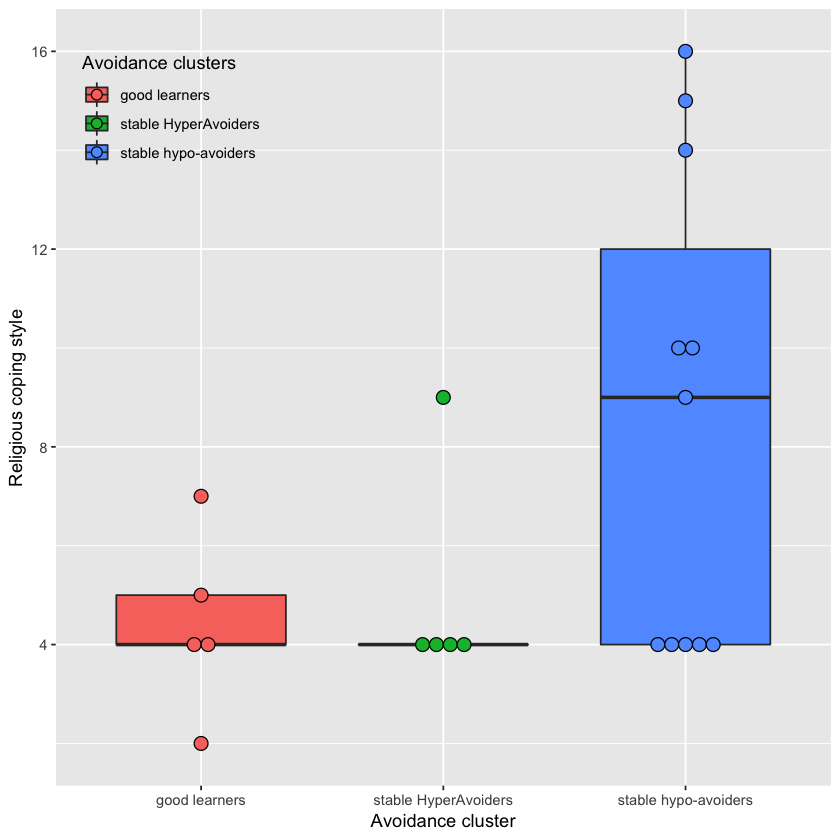

In [45]:
summary(aov(data$Religious ~ data$Avoidance_clusters))

t1waybt(data$Religious ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$Religious ~ data$Avoidance_clusters)

ReligiousBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Religious,
                                    fill=Avoidance_clusters))
ReligiousBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.28, stackdir="center") +
    labs(x="Avoidance cluster", y="Religious coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Humor coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  68.43   34.21   3.172 0.0661 .
Residuals               18 194.15   10.79                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Humor ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Humor ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 463.

Test statistic: 1.1673 
p-value: 0.31965 
Variance explained 0.581 
Effect size 0.762 


Call:
mcppb20(formula = data$Humor ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                psihat  ci.lower ci.upper
stable hypo-avoiders vs. stable HyperAvoiders -5.33333 -10.33333  0.66667
stable hypo-avoiders vs. good learners        -1.71429  -6.28571  3.19048
stable HyperAvoiders vs. good learners         3.61905  -2.00000  8.47619
                                              p-value
stable hypo-avoiders vs. stable HyperAvoiders 0.04841
stable hypo-avoiders vs. good learners        0.54591
stable HyperAvoiders vs. good learners        0.15359



	Kruskal-Wallis rank sum test

data:  data$Humor by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.8243, df = 2, p-value = 0.08962


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

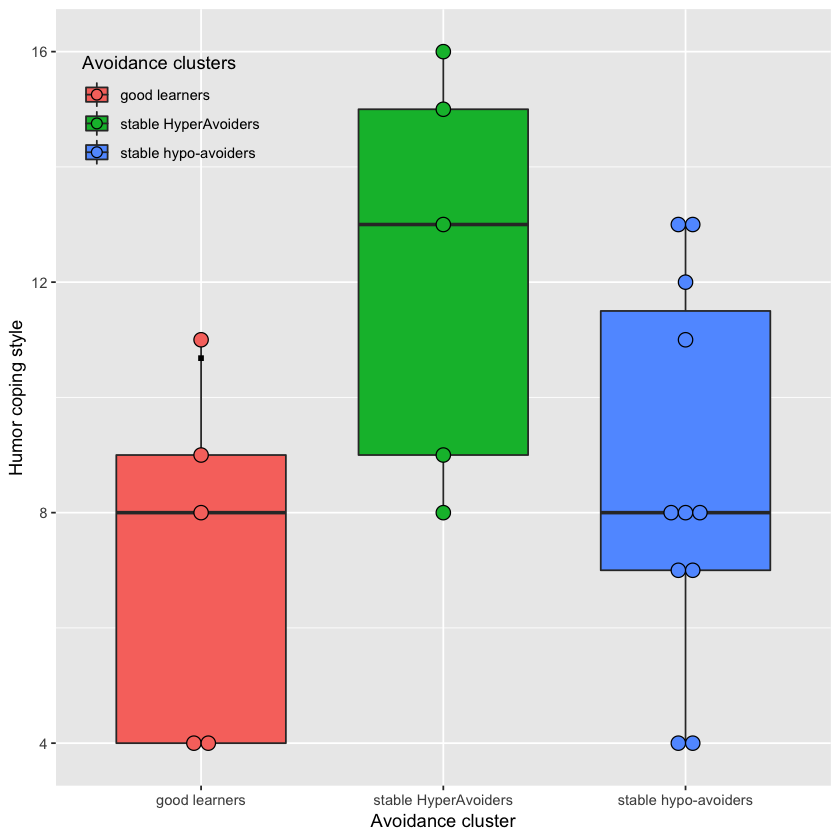

In [47]:
summary(aov(data$Humor ~ data$Avoidance_clusters))

t1waybt(data$Humor ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$Humor ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$Humor ~ data$Avoidance_clusters)


HumorBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Humor,
                                    fill=Avoidance_clusters))
HumorBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Humor coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label=".", size=12)

## Suppression of competing activities coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  55.60  27.801   5.461  0.014 *
Residuals               18  91.64   5.091                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Suppress ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Suppress ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 340.

Test statistic: 4.91 
p-value: 0.01765 
Variance explained 0.756 
Effect size 0.87 



	Kruskal-Wallis rank sum test

data:  data$Suppress by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.1704, df = 2, p-value = 0.01682


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

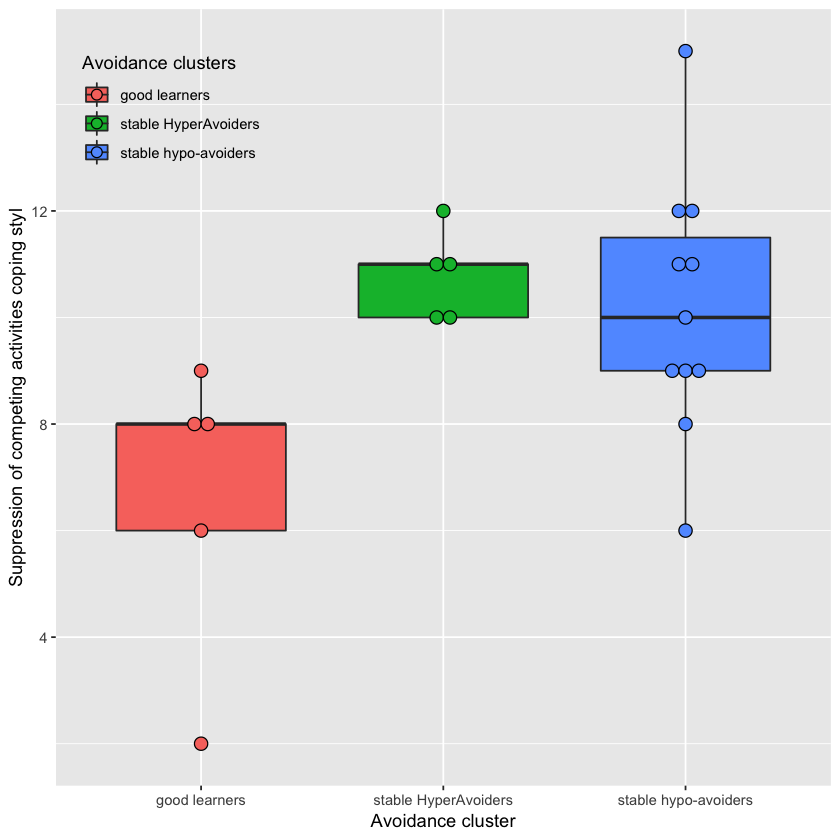

In [48]:
summary(aov(data$Suppress ~ data$Avoidance_clusters))

t1waybt(data$Suppress ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$Suppress ~ data$Avoidance_clusters)

SuppressBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Suppress,
                                    fill=Avoidance_clusters))
SuppressBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Suppression of competing activities coping styl") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Mental disengagement coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  13.61   6.803   1.583  0.233
Residuals               18  77.35   4.297               
6 observations deleted due to missingness

Warning message in t1waybt(data$MentalDis ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$MentalDis ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 465.

Test statistic: 1.701 
p-value: 0.24301 
Variance explained 0.239 
Effect size 0.488 


Call:
mcppb20(formula = data$MentalDis ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                psihat ci.lower ci.upper
stable hypo-avoiders vs. stable HyperAvoiders -2.33333 -6.66667  2.33333
stable hypo-avoiders vs. good learners        -0.61905 -3.52381  2.61905
stable HyperAvoiders vs. good learners         1.71429 -1.71429  5.38095
                                              p-value
stable hypo-avoiders vs. stable HyperAvoiders 0.21870
stable hypo-avoiders vs. good learners        0.67947
stable HyperAvoiders vs. good learners        0.26210



	Kruskal-Wallis rank sum test

data:  data$MentalDis by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.3401, df = 2, p-value = 0.3103


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

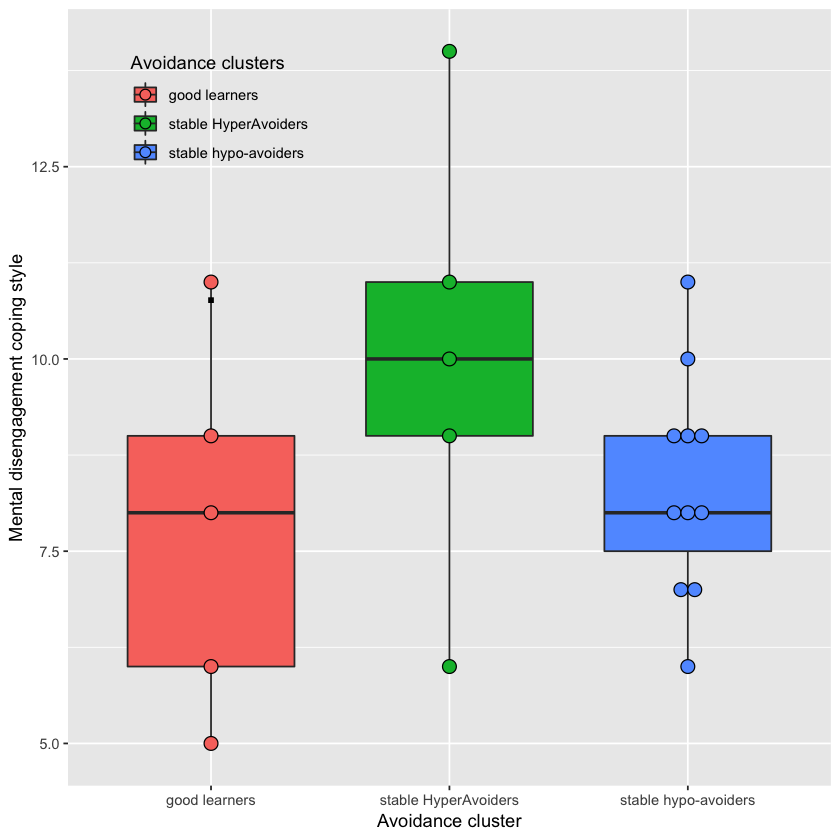

In [49]:
summary(aov(data$MentalDis ~ data$Avoidance_clusters))

t1waybt(data$MentalDis ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$MentalDis ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$MentalDis ~ data$Avoidance_clusters)

MentalDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, MentalDis,
                                    fill=Avoidance_clusters))
MentalDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.18, stackdir="center") +
    labs(x="Avoidance cluster", y="Mental disengagement coping style") + 
    theme(legend.position=c(0.2,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label=".", size=12)

## Behavioral disengagement coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   2.31   1.153   0.365  0.699
Residuals               18  56.84   3.158               
6 observations deleted due to missingness

Warning message in t1waybt(data$BehDis ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$BehDis ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 389.

Test statistic: 1.1925 
p-value: 0.28792 
Variance explained 0.144 
Effect size 0.38 



	Kruskal-Wallis rank sum test

data:  data$BehDis by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.86268, df = 2, p-value = 0.6496


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

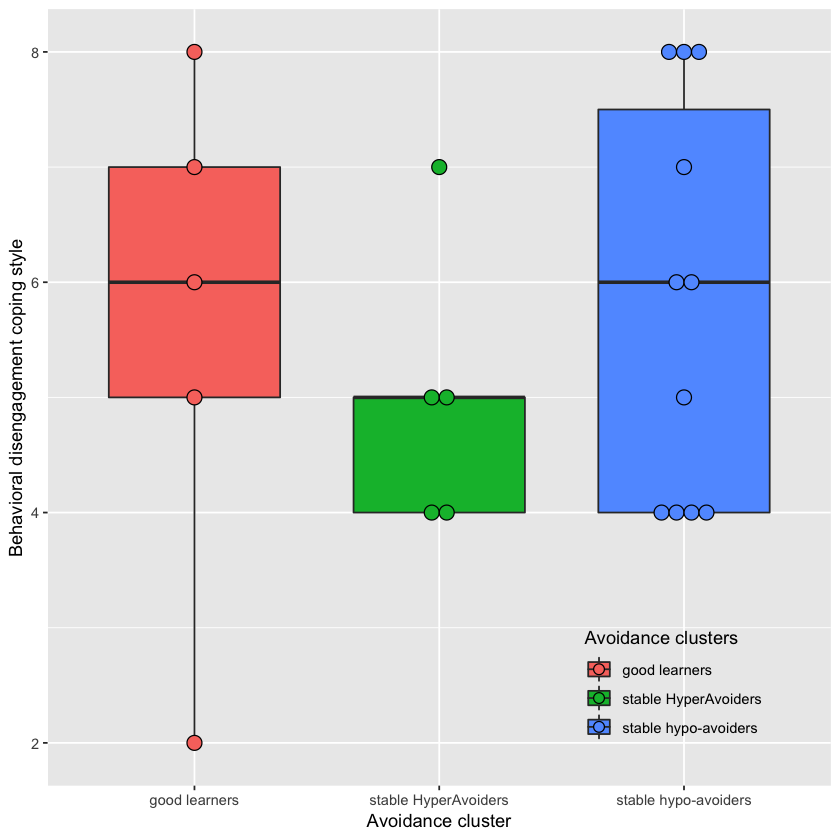

In [50]:
summary(aov(data$BehDis ~ data$Avoidance_clusters))

t1waybt(data$BehDis ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$BehDis ~ data$Avoidance_clusters)

BehDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BehDis,
                                    fill=Avoidance_clusters))
BehDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.13, stackdir="center") +
    labs(x="Avoidance cluster", y="Behavioral disengagement coping style") + 
    theme(legend.position=c(0.8,0.13)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Use of emotional social support coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  109.6   54.81   5.299 0.0155 *
Residuals               18  186.2   10.34                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$EmoSoc ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$EmoSoc ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 464.

Test statistic: 6.9468 
p-value: 0.00647 
Variance explained 0.555 
Effect size 0.745 


Call:
mcppb20(formula = data$EmoSoc ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                psihat ci.lower ci.upper
stable hypo-avoiders vs. stable HyperAvoiders  2.00000 -7.00000  5.00000
stable hypo-avoiders vs. good learners        -4.09524 -8.28571 -1.28571
stable HyperAvoiders vs. good learners        -6.09524 -9.28571  1.66667
                                              p-value
stable hypo-avoiders vs. stable HyperAvoiders 0.65109
stable hypo-avoiders vs. good learners        0.00501
stable HyperAvoiders vs. good learners        0.06678



	Kruskal-Wallis rank sum test

data:  data$EmoSoc by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.6019, df = 2, p-value = 0.02235


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

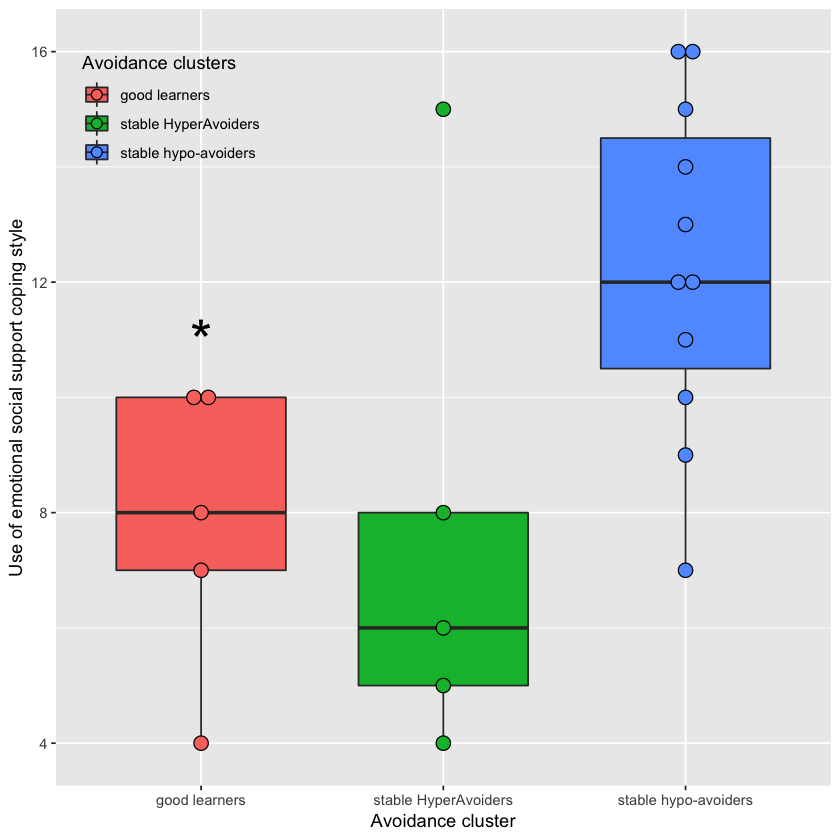

In [51]:
summary(aov(data$EmoSoc ~ data$Avoidance_clusters))

t1waybt(data$EmoSoc ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$EmoSoc ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$EmoSoc ~ data$Avoidance_clusters)

EmoSocBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, EmoSoc,
                                    fill=Avoidance_clusters))
EmoSocBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Use of emotional social support coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label="*", size=12)

## Substance use coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  1.139  0.5697   0.525    0.6
Residuals               18 19.527  1.0848               
6 observations deleted due to missingness

Warning message in t1waybt(data$Subst ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Subst ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 20.

Test statistic: NaN 
p-value: NaN 
Variance explained 0.291 
Effect size 0.54 



	Kruskal-Wallis rank sum test

data:  data$Subst by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.60536, df = 2, p-value = 0.7388


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

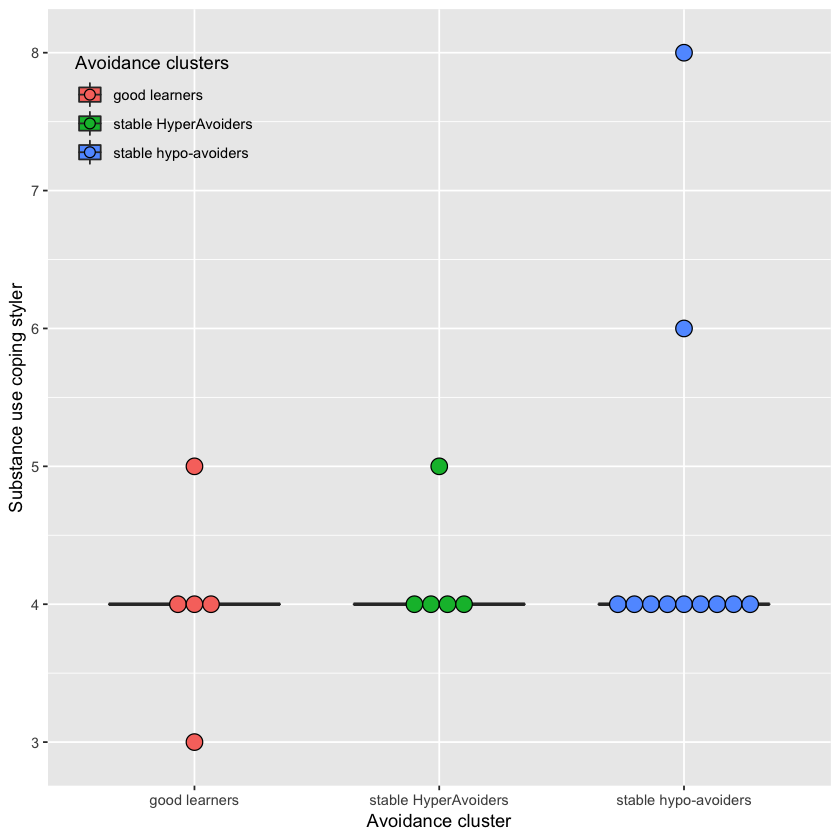

In [52]:
summary(aov(data$Subst ~ data$Avoidance_clusters))

t1waybt(data$Subst ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$Subst ~ data$Avoidance_clusters)

SubstBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Subst,
                                    fill=Avoidance_clusters))
SubstBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.12, stackdir="center") +
    labs(x="Avoidance cluster", y="Substance use coping styler") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Planning coping style

                        Df Sum Sq Mean Sq F value  Pr(>F)   
data$Avoidance_clusters  2   93.7   46.85    7.14 0.00521 **
Residuals               18  118.1    6.56                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Plan ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Plan ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 312.

Test statistic: 3.7696 
p-value: 0.03526 
Variance explained 0.689 
Effect size 0.83 



	Kruskal-Wallis rank sum test

data:  data$Plan by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.493, df = 2, p-value = 0.01431


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

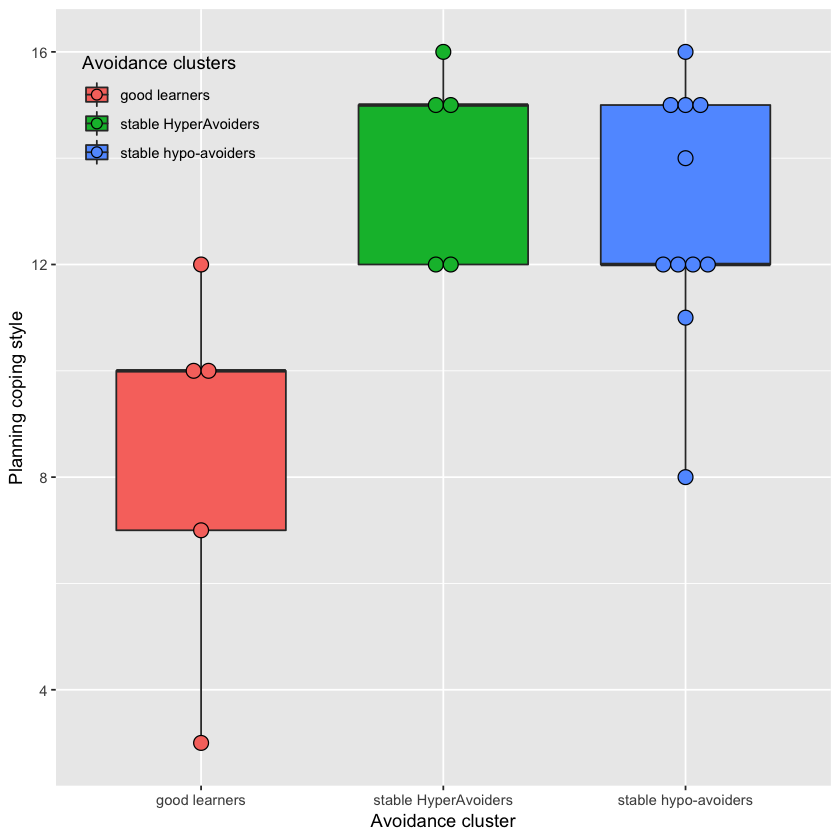

In [53]:
summary(aov(data$Plan ~ data$Avoidance_clusters))

t1waybt(data$Plan ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$Plan ~ data$Avoidance_clusters)

PlanBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Plan,
                                    fill=Avoidance_clusters))
PlanBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.28, stackdir="center") +
    labs(x="Avoidance cluster", y="Planning coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## PosTot

                        Df Sum Sq Mean Sq F value  Pr(>F)   
data$Avoidance_clusters  2   2375  1187.6   6.751 0.00649 **
Residuals               18   3167   175.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$PosTot ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$PosTot ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 446.

Test statistic: 16.6321 
p-value: 0.06278 
Variance explained 0.407 
Effect size 0.638 



	Kruskal-Wallis rank sum test

data:  data$PosTot by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.5709, df = 2, p-value = 0.0227


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

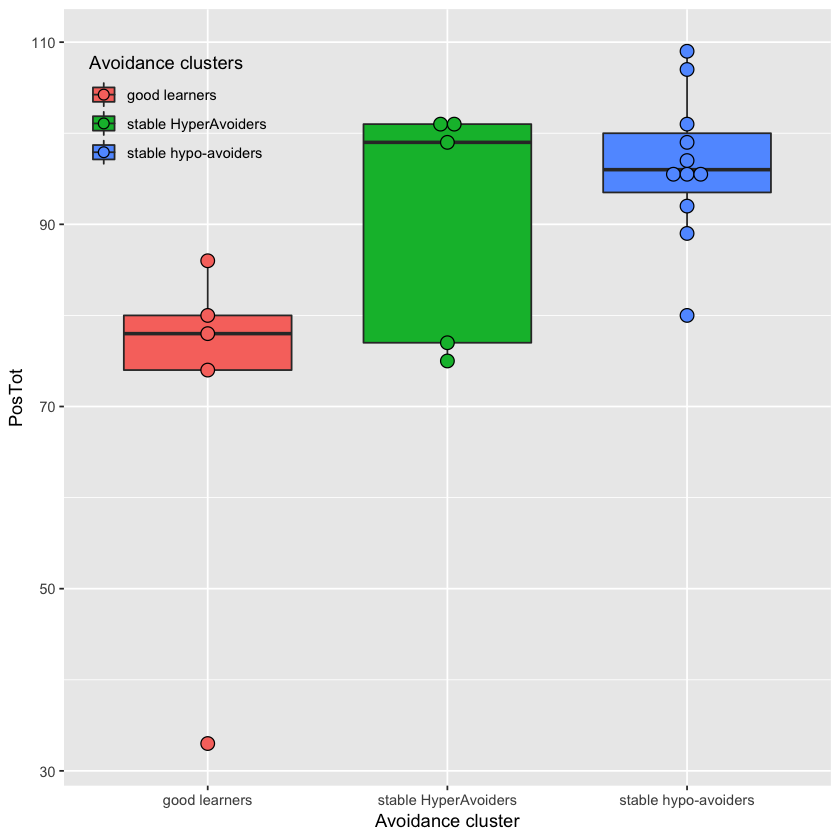

In [54]:
summary(aov(data$PosTot ~ data$Avoidance_clusters))

t1waybt(data$PosTot ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$PosTot ~ data$Avoidance_clusters)

PosTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, PosTot,
                                    fill=Avoidance_clusters))
PosTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=1.5, stackdir="center") +
    labs(x="Avoidance cluster", y="PosTot") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## NegTot

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  213.7  106.85   2.379  0.121
Residuals               18  808.6   44.92               
6 observations deleted due to missingness

Warning message in t1waybt(data$NegTot ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$NegTot ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 424.

Test statistic: 0.528 
p-value: 0.46698 
Variance explained 0.394 
Effect size 0.628 



	Kruskal-Wallis rank sum test

data:  data$NegTot by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.9971, df = 2, p-value = 0.3684


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

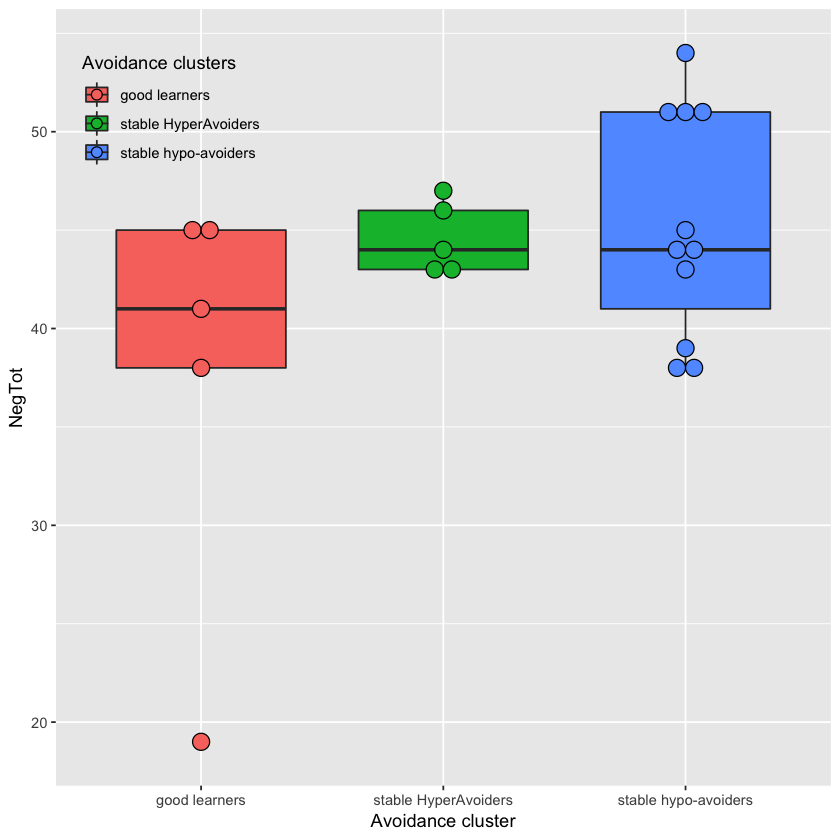

In [55]:
summary(aov(data$NegTot ~ data$Avoidance_clusters))

t1waybt(data$NegTot ~ data$Avoidance_clusters, tr = .2, nboot = 599)

kruskal.test(data$NegTot ~ data$Avoidance_clusters)

NegTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, NegTot,
                                    fill=Avoidance_clusters))
NegTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.87, stackdir="center") +
    labs(x="Avoidance cluster", y="NegTot") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

'STAI_S' 'STAI_T' 'BIS' 'AI' 'AllAR' 'STAIS_Group' 'BIS_Group' 'ID2' 'STAIT_Groups'

'BISMedian_Group'   'ShockVolts' 'MeanBP_Avoid' 'Mean_BP_Motor' 'RT_ALL_Avoid' 'RT_ALL_Motor' 'RT_Early_Avoid' 'RT_Late_Avoid' 'RT_Early_Motor' 'RT_Late_Motor' 'Age' 'Ancestry' 'Sex' 'Marital_Status' 'Student' 'Education' 'Yrs_ed' 'WorkingNow'


'VAS_Pre' 'VAS_Post' 'VAS_Task' 'Change_group' 'SumChangePerf'  'PERF_LEARN_GROUP' 'AVG_1ST6' 'AVG_LAST6' 'DIFF'  'Chg2Grp' 'PosRein_Sub' 'Vent_Sub' 'InsSoc_Sub' 'Res_Sub' 'Active_Sub' 'Passive_Sub' 



COPE inventory
“the active coping, planning, suppression, restraint, instrumental social support, emotional social support, positive reinterpretation, acceptance, religion, venting, denial, behavioral disengagement, mental disengagement, and substance use subscales of the COPE”



Barrat’s Impulsivity Scale
'“the attention, motor, self-control, cognitive coping, and perseverance subscales, as well as the total score for the BIS”


'BIS_Total' 'BIS_Attention' 'BIS_Motor' 'BIS_SlfCtl' 'BIS_CogCpx' 'BIS_Prsvr' 'BIS_CogIns' 'BIS_AttImp' 'BIS_MtrImp' 'BIS_NPlImp


Intrinsic Motivation Inventory
“the interest/enjoyment, perceived competence, perceived choice,
and pressure/tension subscales, as well as the total score for the IMI”

'IMITotal' 'IMIInterest' 'IMICompetence' 'IMIEffort' 'IMIPressure' 'IMIRelated'